In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/content/drive/MyDrive/haberman.csv")
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
df.shape

(305, 4)

In [5]:
df.columns = ["age", "year of birth", "no of nodes", "survived"]
df.head()

,age,year of birth,no of nodes,survived
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
x = df.drop(columns = ["survived"])
m = np.mean(x)
std = np.std(x)
#print(x.head)
x = (x-m)/std
y = df["survived"]
y=y.replace(2,0)
ones = np.ones((x.shape[0],1))
x = np.hstack((ones,x))
print(x[0:5])


[[ 1.         -2.10053274 -0.2613877  -0.14414708]
 [ 1.         -2.10053274  0.66204762 -0.561535  ]
 [ 1.         -2.00730479 -1.18482303 -0.28327639]
 [ 1.         -2.00730479  0.66204762 -0.00501778]
 [ 1.         -1.82084888 -1.4926348   0.82975806]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [7]:
y = np.array(y)
y.shape

(305,)

In [23]:
x_tr, x_test, y_tr, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 3 )
x_tr.shape

(244, 4)

In [24]:
def sigmoid(X):
  return 1.0 / (1.0 + np.exp(-X))

In [25]:
def hypothesis(X,theta):
  return sigmoid(np.dot(X,theta))

In [26]:
def gradient(X,y,theta):
  y_p = hypothesis(X,theta)
  grad = np.dot(X.T, (y - y_p))
  return grad/X.shape[0]

In [27]:
def cost(X,y,theta):
  y_p = hypothesis(X,theta)
  cost = np.mean(y*np.log(y_p) + (1-y)*np.log(1-y_p))
  cost = cost*-1
  return cost

In [28]:
def gradient_descent(x,y,learning_rate,max_steps):
  m,n = x.shape
  cost_epoch = []
  theta = np.zeros((n,))

  for i in range(max_steps):
    grad = gradient(x,y,theta)
    e = cost(x,y,theta)
    cost_epoch.append(e)
    theta += learning_rate*grad
  return theta, cost_epoch

In [29]:
theta,epoch = gradient_descent(x_tr,y_tr,learning_rate = 0.01, max_steps =2000)

In [30]:
theta

array([ 0.91760584, -0.19294561, -0.00306552, -0.60811785])

In [31]:
epoch[-10:]

[0.5590188889311822,
 0.559018573004646,
 0.5590182580868771,
 0.5590179441745836,
 0.5590176312644837,
 0.5590173193533072,
 0.559017008437795,
 0.5590166985146986,
 0.5590163895807803,
 0.5590160816328136]

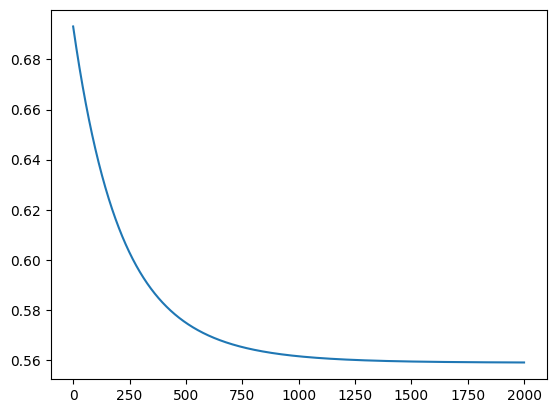

In [32]:
plt.plot(epoch)

In [33]:
def predict(X, theta):
    h_theta = hypothesis(X, theta)
    output = np.zeros(h_theta.shape)

    output[h_theta>0.5] = 1
    output = output.astype('int')

    return output

In [34]:
preds = predict(x_test, theta)

In [35]:
print(preds,"\n",y_test)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1] 
 [1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1]


In [36]:
def accuracy(preds, labels):
    labels = labels.astype('int')
    print(np.sum(preds == labels)/labels.shape[0])

In [37]:
accuracy(preds, y_test)

0.8360655737704918
